<a href="https://colab.research.google.com/github/abshilpa/Chronic-Kidney-Disease-Data-Science-Project/blob/main/MSC_Final_project_CKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## MSC Data Science Final Project on Chronic Kidney Disease by Abbugari Dhanalakshmi Shilpa
#Chronic Kidney Disease Prediction Overview
#This project is focused on predicting chronic kidney disease (CKD) by analyzing essential medical parameters,
#including Specific Gravity, Hypertension, Hemoglobin, Diabetes Mellitus, Albumin, Appetite, Red Blood Cell Count, Pus Cell, and more.
#By utilizing advanced machine learning models, the system delivers precise predictions to support healthcare professionals
#in early diagnosis and informed decision-making, ultimately enhancing patient outcomes.

## Importing Required Libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# To Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# set the style of matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set()

## Load the Dataset

In [ ]:
# Loading the dataset
file_path = 'https://raw.githubusercontent.com/abshilpa/Chronic-Kidney-Disease-Data-Science-Project/refs/heads/main/kidney_disease.csv'
CKD_Data = pd.read_csv(file_path)

# Displaying the first few rows of the CKD_Data dataset
CKD_Data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
# Define the standard column names in the same order as they appear in the CKD_Data DataFrame
CKD_Data.columns = [
    'ID', 'Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
    'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
    'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
    'Potassium', 'Hemoglobin', 'Packed Cell Volume', 'White Blood Cell Count',
    'Red Blood Cell Count', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
    'Appetite', 'Pedal Edema', 'Anemia', 'Classification'
]

# Displaying the updated CKD_Data DataFrame with new column names
print("Updated DataFrame with new column names:")
CKD_Data.head()

Updated DataFrame with new column names:


,ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Initial Data Inspection
### View Dataset Summary

In [ ]:
# overall information of the CKD dataset
CKD_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       400 non-null    int64  
 1   Age                      391 non-null    float64
 2   Blood Pressure           388 non-null    float64
 3   Specific Gravity         353 non-null    float64
 4   Albumin                  354 non-null    float64
 5   Sugar                    351 non-null    float64
 6   Red Blood Cells          248 non-null    object 
 7   Pus Cell                 335 non-null    object 
 8   Pus Cell Clumps          396 non-null    object 
 9   Bacteria                 396 non-null    object 
 10  Blood Glucose Random     356 non-null    float64
 11  Blood Urea               381 non-null    float64
 12  Serum Creatinine         383 non-null    float64
 13  Sodium                   313 non-null    float64
 14  Potassium                3

In [ ]:
# description of the CKD  dataset
CKD_Data.describe()

,ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
# View the missing values in CKD_Data

print("\nMissing values in CKD Dataset: ")
print(CKD_Data.isnull().sum())


Missing values in CKD Dataset: 
ID                           0
Age                          9
Blood Pressure              12
Specific Gravity            47
Albumin                     46
Sugar                       49
Red Blood Cells            152
Pus Cell                    65
Pus Cell Clumps              4
Bacteria                     4
Blood Glucose Random        44
Blood Urea                  19
Serum Creatinine            17
Sodium                      87
Potassium                   88
Hemoglobin                  52
Packed Cell Volume          70
White Blood Cell Count     105
Red Blood Cell Count       130
Hypertension                 2
Diabetes Mellitus            2
Coronary Artery Disease      2
Appetite                     1
Pedal Edema                  1
Anemia                       1
Classification               0
dtype: int64


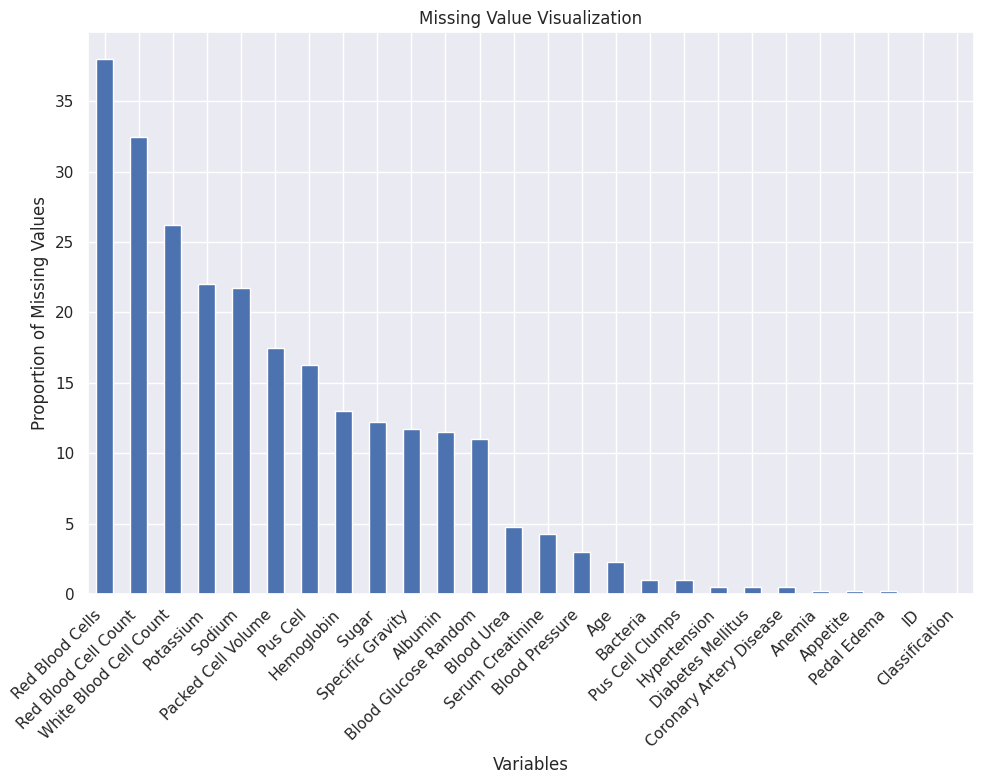

In [ ]:
# Visualize missing values
# Count of number of missing values in each column
missing_values = (CKD_Data.isna().sum()/CKD_Data.shape[0]*100).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.title('Missing Value Visualization')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Replacing non-standard values in multiple columns

# Replacing non-standard values in 'Classification' column
CKD_Data['Classification'] = CKD_Data['Classification'].str.replace('ckd\t', 'ckd', regex=False)

# Verifing  unique values in the 'Classification' column after replacement
print("Unique values in 'Classification' after replacement:")
print(CKD_Data['Classification'].unique())

# Replacing non-standard values in 'Diabetes Mellitus' and 'Coronary Artery Disease' columns
CKD_Data['Diabetes Mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)
CKD_Data['Coronary Artery Disease'].replace(to_replace={'\tno': 'no'}, inplace=True)

# Verifying  unique values in each column
print("Unique values in 'Diabetes Mellitus' after replacement:")
print(CKD_Data['Diabetes Mellitus'].unique())

print("Unique values in 'Coronary Artery Disease' after replacement:")
print(CKD_Data['Coronary Artery Disease'].unique())

Unique values in 'Classification' after replacement:
['ckd' 'notckd']
Unique values in 'Diabetes Mellitus' after replacement:
['yes' 'no' nan]
Unique values in 'Coronary Artery Disease' after replacement:
['no' 'yes' nan]


In [ ]:
# Classifying columns : categorical columns and numerical columns
cat_cols = [col for col in CKD_Data.columns if CKD_Data[col].dtype=='object']
num_cols = [col for col in CKD_Data.columns if CKD_Data[col].dtype!='object']

In [ ]:
# Displaying the  counts and names of the columns
print(f"Count of categorical columns: {len(cat_cols)}")
print("Categorical columns:", cat_cols)

print(f"\nCount of numerical columns: {len(num_cols)}")
print("Numerical columns:", num_cols)


Count of categorical columns: 14
Categorical columns: ['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria', 'Packed Cell Volume', 'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia', 'Classification']

Count of numerical columns: 12
Numerical columns: ['ID', 'Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium', 'Potassium', 'Hemoglobin']


In [ ]:
CKD_Data.groupby('Classification').count()

,ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,...,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia
Classification,,,,,,,,,,,,,,,,,,,,,
ckd,250,242,240,208,209,206,107,194,250,250,...,204,184,152,127,250,250,250,250,250,250
notckd,150,149,148,145,145,145,141,141,146,146,...,144,146,143,143,148,148,148,149,149,149


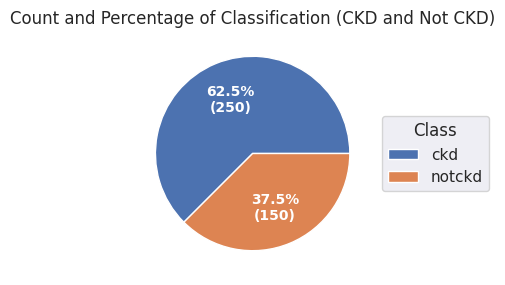

In [ ]:
# Count classifications
classification_counts = CKD_Data['Classification'].value_counts().sort_index()

# Prepare data for pie chart
types = classification_counts.index.values
values = classification_counts.values

# Create pie chart
fig, ax = plt.subplots(figsize=(3, 3), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(
    values,
    labels=types,
    autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100.*np.sum(values))})",
    textprops=dict(color="w"),
)

# Add legend and title
ax.legend(title="Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Count and Percentage of Classification (CKD and Not CKD)")

plt.setp(autotexts, size=10, weight="bold")
plt.show()


### Converting specific columns in a dataset from the object type to a numeric type, which is necessary for numerical analysis

In [ ]:
# Convert object type to numeric type
CKD_Data['Packed Cell Volume']     = pd.to_numeric(CKD_Data['Packed Cell Volume'], errors='coerce')
CKD_Data['White Blood Cell Count'] = pd.to_numeric(CKD_Data['White Blood Cell Count'], errors='coerce')
CKD_Data['Red Blood Cell Count']   = pd.to_numeric(CKD_Data['Red Blood Cell Count'], errors='coerce')
CKD_Data

,ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


## Handle Missing Data
### Numerical Columns: Fill missing values with the median.
### Categorical Columns: Fill missing values with the mode (most frequent value).

### Checking for Missing Values After Imputation

In [ ]:
# Fill missing values for numeric columns with the median
for column in CKD_Data.select_dtypes(include=['float64', 'int64']).columns:
    CKD_Data[column].fillna(CKD_Data[column].median(), inplace=True)

# Fill missing values for categorical columns with the mode
for column in CKD_Data.select_dtypes(include=['object']).columns:
    CKD_Data[column].fillna(CKD_Data[column].mode()[0], inplace=True)

# Verifying that there are no more missing values
print("\nMissing Values After Imputation:")
print(CKD_Data.isnull().sum())


Missing Values After Imputation:
ID                         0
Age                        0
Blood Pressure             0
Specific Gravity           0
Albumin                    0
Sugar                      0
Red Blood Cells            0
Pus Cell                   0
Pus Cell Clumps            0
Bacteria                   0
Blood Glucose Random       0
Blood Urea                 0
Serum Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed Cell Volume         0
White Blood Cell Count     0
Red Blood Cell Count       0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
Classification             0
dtype: int64


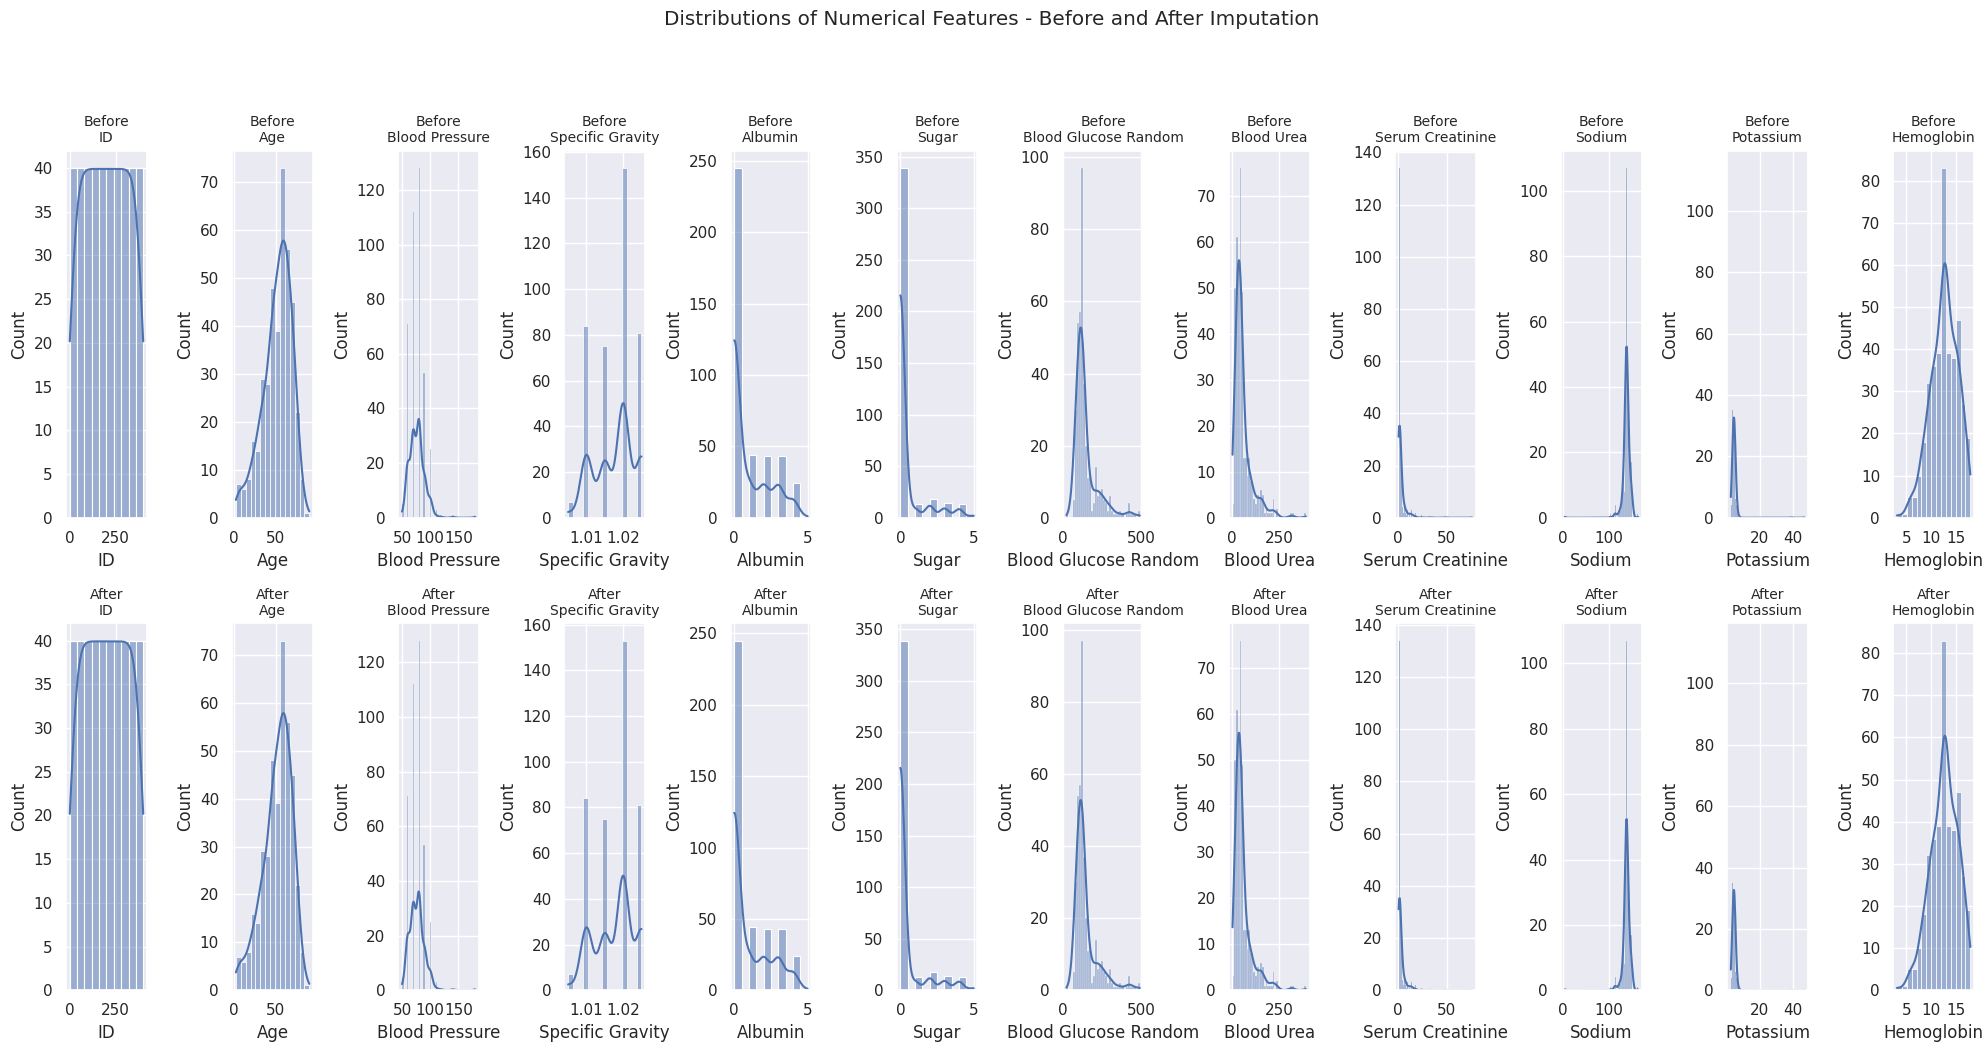

In [ ]:
# Plot distributions before and after imputation

fig, axes = plt.subplots(nrows=2, ncols=len(num_cols), figsize=(20, 10))
fig.suptitle('Distributions of Numerical Features - Before and After Imputation', y=1.05)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Before imputation
for i, col in enumerate(num_cols):
    sns.histplot(CKD_Data[col], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Before\n{col}', fontsize=10)

# After imputation
for i, col in enumerate(num_cols):
    sns.histplot(CKD_Data[col], kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'After\n{col}', fontsize=10)

plt.tight_layout()
plt.show()


## Outlier Detection and Removal
### Using the IQR method to detect outliers for 'White Blood Cell Count' and other numerical columns.

In [ ]:
# Calculate IQR for 'White Blood Cell Count'
Q1 = CKD_Data['White Blood Cell Count'].quantile(0.25)
Q3 = CKD_Data['White Blood Cell Count'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using IQR
outliers_iqr = CKD_Data[(CKD_Data['White Blood Cell Count'] < lower_bound) |
                       (CKD_Data['White Blood Cell Count'] > upper_bound)]

print("Outliers using IQR method:")
print(outliers_iqr)


Outliers using IQR method:
      ID   Age  Blood Pressure  Specific Gravity  Albumin  Sugar  \
48    48  73.0            70.0             1.005      0.0    0.0   
49    49  60.0            70.0             1.010      2.0    0.0   
71    71  46.0            60.0             1.010      1.0    0.0   
88    88  58.0           110.0             1.010      4.0    0.0   
107  107  55.0           100.0             1.015      1.0    4.0   
123  123  43.0            80.0             1.015      2.0    3.0   
127  127  71.0            60.0             1.015      4.0    0.0   
130  130  50.0            90.0             1.010      2.0    0.0   
132  132  50.0            80.0             1.020      0.0    0.0   
147  147  60.0            60.0             1.010      3.0    1.0   
153  153  55.0            90.0             1.010      2.0    1.0   
167  167  34.0            70.0             1.020      0.0    0.0   
181  181  45.0            70.0             1.025      2.0    0.0   
190  190   6.0       

## Exploratory Data Analysis (EDA)
### Boxplot for Identifying Outliers

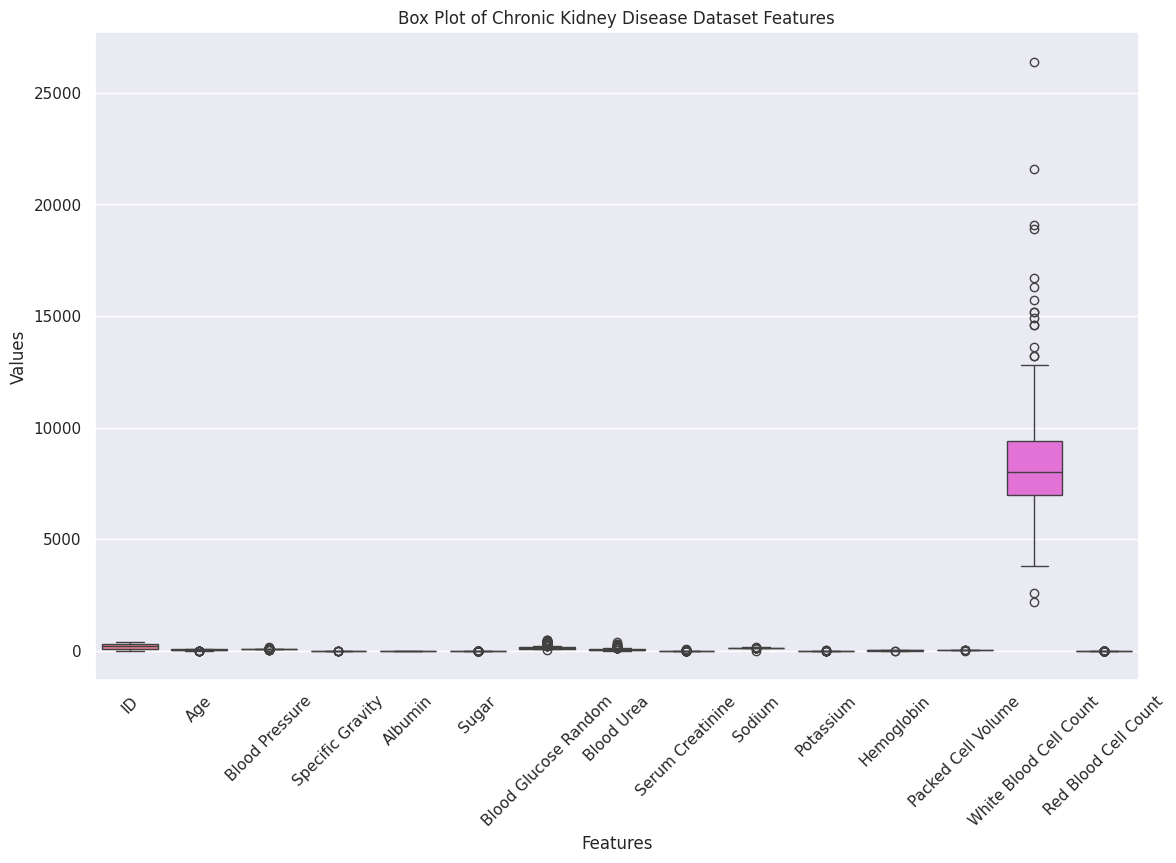

In [ ]:
# Boxplot for visualizing outliers in numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=CKD_Data)
plt.title('Box Plot of Chronic Kidney Disease Dataset Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


## Histogram for Distribution of Numerical Features

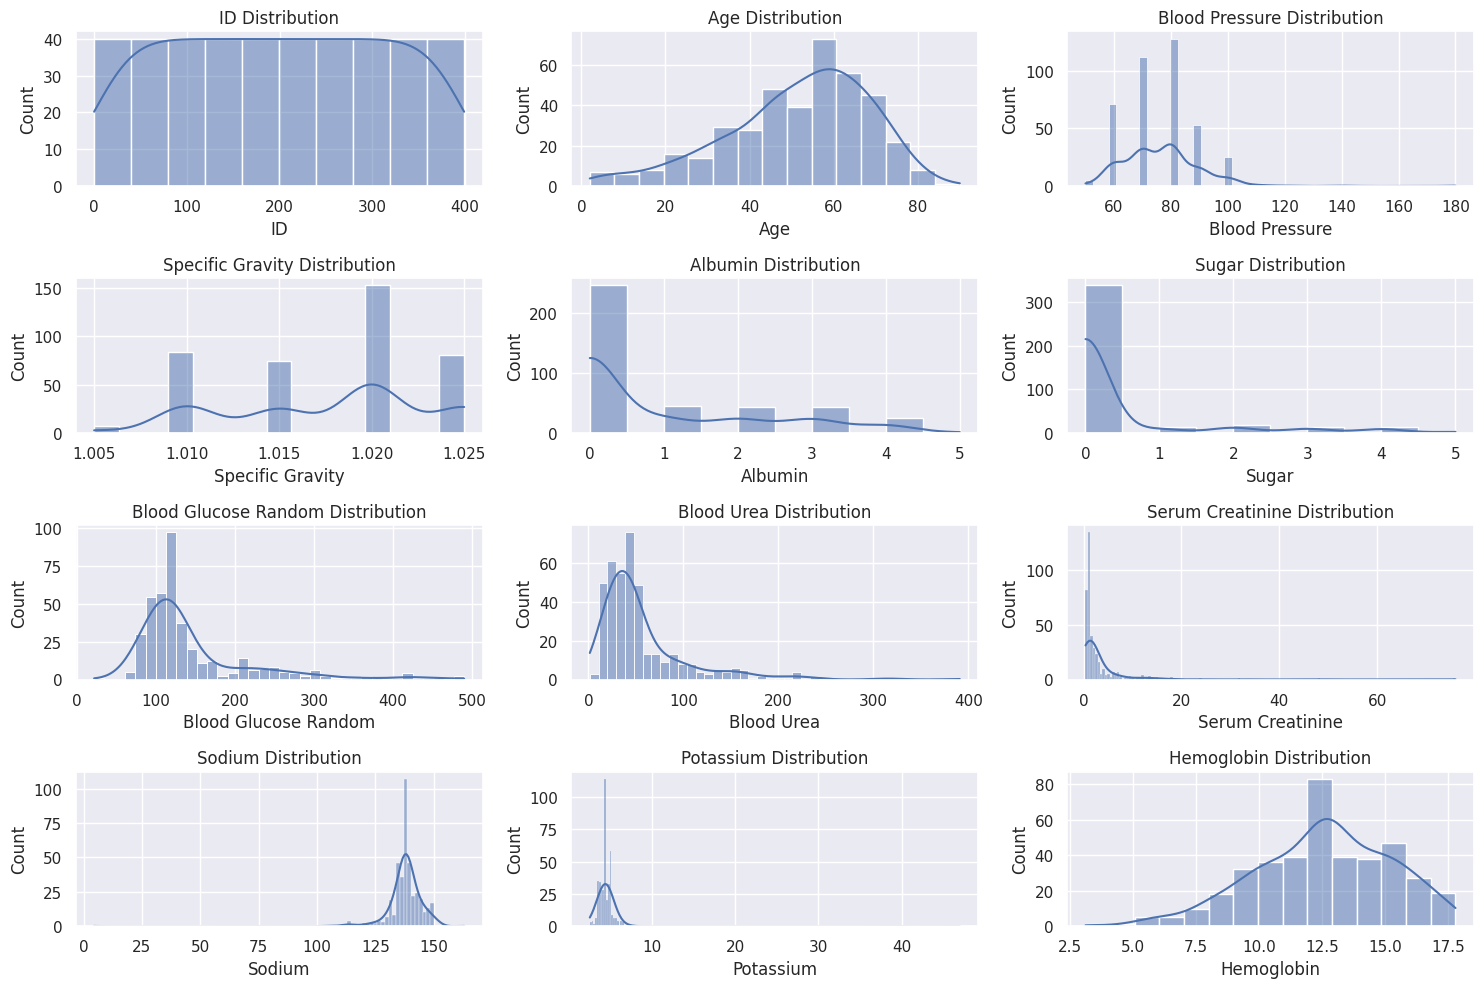

In [ ]:
# Visualizing the distribution of numerical columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(CKD_Data[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

## Feature Scaling
### Standardization using StandardScaler

In [ ]:
# Apply StandardScaler to numerical columns
scaler = StandardScaler()
CKD_Data[num_cols] = scaler.fit_transform(CKD_Data[num_cols])

# Check result after scaling
print(CKD_Data[num_cols].head())

         ID       Age  Blood Pressure  Specific Gravity   Albumin     Sugar  \
0 -1.727726 -0.210031        0.254214          0.421486  0.076249 -0.380269   
1 -1.719066 -2.627234       -1.972476          0.421486  2.363728 -0.380269   
2 -1.710406  0.615355        0.254214         -1.421074  0.838742  2.507853   
3 -1.701745 -0.210031       -0.488016         -2.342354  2.363728 -0.380269   
4 -1.693085 -0.033163        0.254214         -1.421074  0.838742 -0.380269   

   Blood Glucose Random  Blood Urea  Serum Creatinine    Sodium  Potassium  \
0             -0.320122   -0.419451         -0.319668  0.040104  -0.062903   
1             -0.320122   -0.784315         -0.390819  0.040104  -0.062903   
2              3.697618   -0.074858         -0.212942  0.040104  -0.062903   
3             -0.373337   -0.014047          0.142813 -2.896333  -0.737181   
4             -0.519679   -0.622154         -0.284093  0.040104  -0.062903   

   Hemoglobin  
0    1.053226  
1   -0.457965  
2   -1.0

### Normalization using MinMaxScaler

In [ ]:
#Apply MinMaxScaler to numerical columns
scaler = MinMaxScaler()
CKD_Data[num_cols] = scaler.fit_transform(CKD_Data[num_cols])

#Check result after normalization
print(CKD_Data[num_cols].head())

         ID       Age  Blood Pressure  Specific Gravity  Albumin  Sugar  \
0  0.000000  0.522727        0.230769              0.75      0.2    0.0   
1  0.002506  0.056818        0.000000              0.75      0.8    0.0   
2  0.005013  0.681818        0.230769              0.25      0.4    0.6   
3  0.007519  0.522727        0.153846              0.00      0.8    0.0   
4  0.010025  0.556818        0.230769              0.25      0.4    0.0   

   Blood Glucose Random  Blood Urea  Serum Creatinine    Sodium  Potassium  \
0              0.211538    0.088575          0.010582  0.842271   0.042697   
1              0.211538    0.042362          0.005291  0.842271   0.042697   
2              0.856838    0.132221          0.018519  0.842271   0.042697   
3              0.202991    0.139923          0.044974  0.671924   0.000000   
4              0.179487    0.062901          0.013228  0.842271   0.042697   

   Hemoglobin  
0    0.836735  
1    0.557823  
2    0.442177  
3    0.551020  


### Distribution of Scaled Features

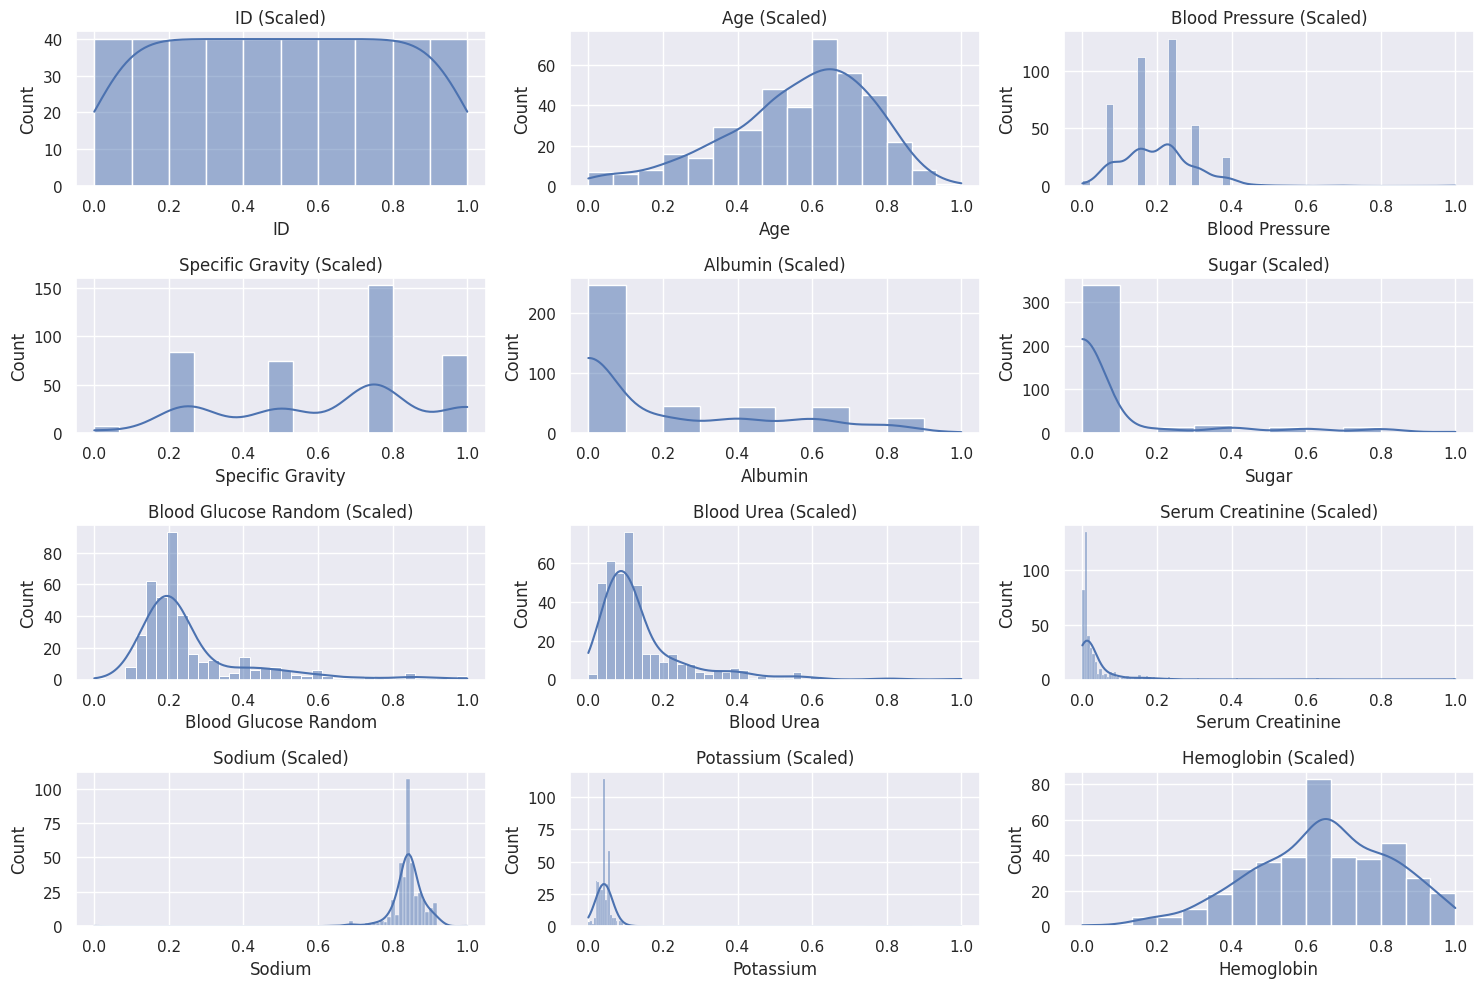

In [ ]:
# Plot histograms after scaling
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(CKD_Data[col], kde=True)
    plt.title(f'{col} (Scaled)')

plt.tight_layout()
plt.show()

## Feature Encoding
### Binary Encoding using LabelEncoder for Binary Features

In [ ]:
# Encode binary categorical columns
binary_cols = ['Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
               'Appetite', 'Pedal Edema', 'Anemia', 'Classification']
le = LabelEncoder()
for col in binary_cols:
    CKD_Data[col] = le.fit_transform(CKD_Data[col])

## One-Hot Encoding for Multicategory Columns

In [ ]:
# One-hot encode categorical columns with more than two categories
categorical_columns = ['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria']
CKD_Data = pd.get_dummies(CKD_Data, columns=categorical_columns, drop_first=True)


KeyError: "None of [Index(['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria'], dtype='object')] are in the [columns]"

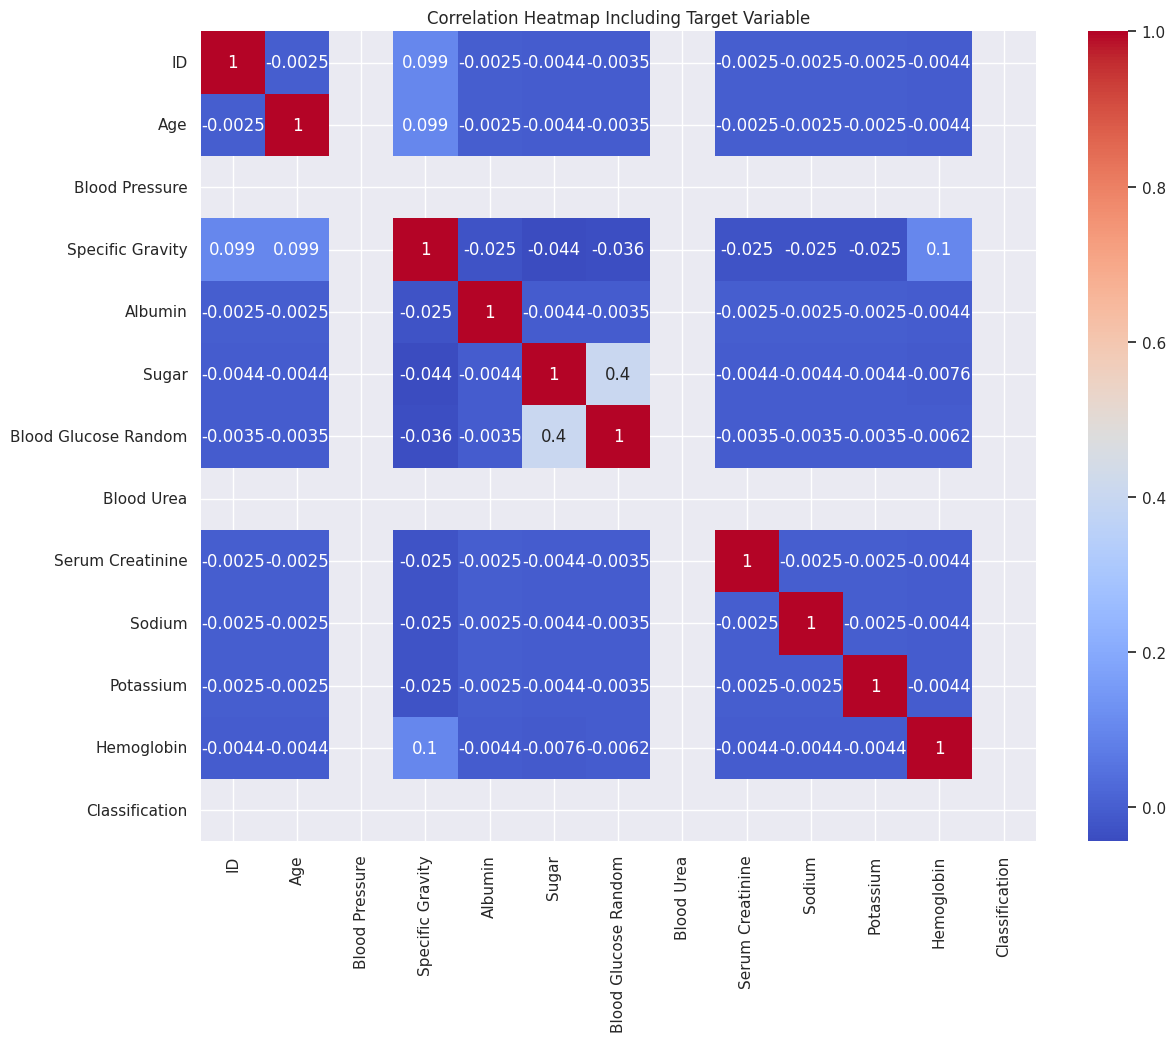

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(CKD_Data[num_cols + ['Classification']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap Including Target Variable")
plt.show()